# ***Лабораторная работа №2***
# "Предварительная обработка текстовых данных"
# <i>Выполнил: Антипов Д.А. А-01-19</i>

## **Цель работы:**

Получить практические навыки обработки текстовых данных. Научиться проводить предварительную обработку текстовых данных и выявлять параметры обработки, позволяющие добиться наилучшей точности классификации.

## **Выполнение**

1. В среде Google Collab создать новый ноутбук (Notebook)

2. Импортировать необходимые для работы библиотеки и модули

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from typing import Dict, List, Tuple
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

3. Загрузить обучающую и экзаменационную выборку в соответствие с вариантом

In [ ]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'rec.autos']
remove = ('headers', 'footers', 'quotes')
twenty_train = fetch_20newsgroups(subset='train', random_state=42, categories = categories, remove = remove )
twenty_test = fetch_20newsgroups(subset='test', random_state=42, categories = categories, remove = remove )
twenty_dataset = fetch_20newsgroups(subset='all', random_state=42, categories = categories, remove = remove )

4. Вывести на экран по одному-два документа каждого класса.

In [ ]:
print('Категория:', twenty_train.target_names[twenty_train.target[0]], '\n', twenty_train.data[0], '\n')
print('Категория:', twenty_train.target_names[twenty_train.target[7]], '\n', twenty_train.data[7], '\n')
print('Категория:', twenty_train.target_names[twenty_train.target[10]], '\n', twenty_train.data[10], '\n')

Категория: comp.graphics 
 Hello, I realize that this might be a FAQ but I have to ask since I don't get a
change to read this newsgroup very often.  Anyways for my senior project I need
to convert an AutoCad file to a TIFF file.  Please I don't need anyone telling
me that the AutoCAD file is a vector file and the TIFF is a bit map since I
have heard that about 100 times already I would just like to know if anyone
knows how to do this or at least point me to the right direction. 

Категория: comp.os.ms-windows.misc 
 HI there!  I have a few games that I'd like to run under Windows 3.1 and can't
get the PIFS adjusted right.   For example Wing Commander.  In my DOS Prompt, I
have more than 620K available for programs.  This is enough to run WC.
So I build a PIF giving WC a couple of megs of extended memory etc.. and run 
it.  WC prompts: "Loading Wing Commander..." and then a message about 
"Using extended memory..." etc... and then my screen goes black (just before
the opening scene-the

5. Применить стемминг, записав обработанные выборки (тестовую и обучающую) в новые переменные

In [ ]:
# Стемминг для обучающей  выборки
porter_stemmer = PorterStemmer()
stem_train = []
for text in twenty_train.data:
    nltk_tokens = word_tokenize(text)
    line = ''
    for word in nltk_tokens:
        line += ' ' + porter_stemmer.stem(word)
    stem_train.append(line)

# Стемминг для тестовой выборки
stem_test = []
for text in twenty_test.data:
    nltk_tokens = word_tokenize(text)
    line = ''
    for word in nltk_tokens:
        line += ' ' + porter_stemmer.stem(word)
    stem_test.append(line)

6. Провести векторизацию выборки: a. Векторизовать обучающую и тестовую выборки простым подсчетом слов (CountVectorizer) b. Вывести и проанализировать первые 20 наиболее частотных слов всей выборки и каждого класса по-отдельности. c. Рассчитать сходство по коэффициенту Жаккара между тремя классами d. Применить процедуру отсечения стоп-слов и повторить пункты b-c. e. Провести пункты a – c для обучающей и тестовой выборки, для которой проведена процедура стемминга. f. Векторизовать выборки с помощью TfidfTransformer (с использованием TF и TF-IDF взвешиваний).

a. Векторизация выборок простым подсчетом слов

In [ ]:
vect = CountVectorizer(max_features = 10000)

vect.fit(twenty_train.data)
train_data = vect.transform(twenty_train.data)
test_data = vect.transform(twenty_test.data)

In [ ]:
# Первые 20 наиболее частотных слов всей выборки

x = list(zip(vect.get_feature_names_out(), np.ravel(train_data.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x.sort(key=SortbyTF, reverse = True)
print (x[:20])

[('ax', 62376), ('the', 10022), ('to', 5235), ('max', 4482), ('and', 4441), ('of', 3910), ('is', 3414), ('it', 3066), ('in', 2877), ('for', 2655), ('that', 2312), ('you', 2282), ('on', 1818), ('have', 1600), ('this', 1563), ('with', 1522), ('or', 1365), ('be', 1351), ('are', 1323), ('as', 1309)]


b. Вывести и проанализировать первые 20 наиболее частотных слов всей выборки и каждого класса по-отдельности.

In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.graphics'

comp_graphics_data = []
for i in list(np.where(twenty_train.target == 0)[0]):
              comp_graphics_data.append(twenty_train.data[i])

vect.fit(comp_graphics_data)
train_data_comp_graphics = vect.transform(comp_graphics_data)

x_comp_graphics = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_graphics.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_graphics.sort(key=SortbyTF, reverse = True)
print (x_comp_graphics[:20])

[('the', 3652), ('to', 2146), ('and', 1961), ('of', 1745), ('is', 1407), ('for', 1259), ('in', 1144), ('it', 1113), ('you', 859), ('that', 771), ('on', 728), ('this', 667), ('or', 601), ('with', 579), ('be', 568), ('can', 525), ('are', 514), ('have', 512), ('if', 498), ('from', 496)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.os.ms-windows.misc'

comp_os_data = []
for i in list(np.where(twenty_train.target == 1)[0]):
              comp_os_data.append(twenty_train.data[i])

vect.fit(comp_os_data)
train_data_comp_os = vect.transform(comp_os_data)

x_comp_os = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_os.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_os.sort(key=SortbyTF, reverse = True)
print (x_comp_os[:20])

[('ax', 62375), ('max', 4474), ('g9v', 1166), ('b8f', 1111), ('a86', 916), ('pl', 822), ('145', 755), ('1d9', 672), ('windows', 645), ('34u', 549), ('1t', 510), ('0t', 505), ('bhj', 456), ('75u', 447), ('3t', 441), ('giz', 433), ('2di', 414), ('cx', 373), ('wm', 358), ('2tm', 353)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'rec.autos'

rec_autos_data = []
for i in list(np.where(twenty_train.target == 2)[0]):
              rec_autos_data.append(twenty_train.data[i])

vect.fit(rec_autos_data)
train_data_rec_autos = vect.transform(rec_autos_data)

x_rec_autos = list(zip(vect.get_feature_names_out(), np.ravel(train_data_rec_autos.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_rec_autos.sort(key=SortbyTF, reverse = True)
print (x_rec_autos[:20])

[('car', 515), ('cars', 204), ('like', 203), ('just', 189), ('don', 169), ('good', 148), ('new', 129), ('engine', 125), ('know', 118), ('think', 116), ('time', 108), ('right', 94), ('speed', 89), ('oil', 84), ('use', 82), ('does', 80), ('people', 80), ('drive', 79), ('problem', 79), ('com', 78)]


Как и ожидалось, в каждом классе и во всей выборке имеется множество слов, не несущих смыловой нагрузки.

c. Рассчитать сходство по коэффициенту Жаккара между 3 классами.

In [ ]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union


comp_graphics_list = []
for i in x_comp_graphics:
  comp_graphics_list.append(i[0])
print(comp_graphics_list)


comp_os_list = []
for i in x_comp_os:
  comp_os_list.append(i[0])
print(comp_os_list)


rec_autos_list = []
for i in x_rec_autos:
  rec_autos_list.append(i[0])
print(rec_autos_list)

print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'comp.os.ms-windows.misc\':', jaccard_similarity(comp_graphics_list, comp_os_list))
print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'rec.autos\':', jaccard_similarity(comp_graphics_list, rec_autos_list))
print('\nКоэф. Жаккара для классов \'comp.os.ms-windows.misc\' и \'rec.autos\':', jaccard_similarity(comp_os_list, rec_autos_list))

['the', 'to', 'and', 'of', 'is', 'for', 'in', 'it', 'you', 'that', 'on', 'this', 'or', 'with', 'be', 'can', 'are', 'have', 'if', 'from', 'image', 'as', 'graphics', 'but', 'not', 'at', 'an', 'there', 'will', 'any', 'by', 'edu', 'jpeg', 'file', 'some', 'all', 'also', 'which', 'about', 'use', 'has', 'would', 'data', 'files', 'images', 'software', 'do', 'one', 'other', 'so', 'program', 'ftp', 'what', 'me', 'available', 'was', 'your', 'my', 'out', 'format', 'more', 'color', 'get', 'like', 'know', 'we', 'pub', 'gif', 'does', 'don', 'they', 'mail', 'version', 'bit', '3d', 'thanks', 'system', 'package', 'than', 'very', 'using', 'code', 'information', 'anyone', 'computer', 'need', 'display', 'how', 'please', 'find', 'line', 'no', 'only', 'am', 'just', 'up', 'etc', 'these', 'time', 'help', 'where', 'then', 'when', 'good', 'send', 'free', 'see', 'into', '24', 'may', 'programs', 'should', 'used', 'windows', 'many', 'been', 'work', 'them', 'well', 'much', 'want', 'could', 'processing', 'mac', 'prob

Наибольший коэффициент схожести имеют классы 1 и 3 ('comp.graphics' и 'rec.autos\')

d. Провести процедуру отсечения стоп-слов и повторить пункты b-c.

In [ ]:
vect = CountVectorizer(max_features = 10000, stop_words = 'english')

vect.fit(twenty_train.data)

train_data_stop_words = vect.transform(twenty_train.data)
test_data_stop_wors = vect.transform(twenty_test.data)

# Выведем первые 20 наиболее часто встречающихся слов после отсечения стоп-слов
x_stop_words = list(zip(vect.get_feature_names_out(), np.ravel(train_data_stop_words.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_stop_words.sort(key=SortbyTF, reverse = True)
print (x_stop_words[:20])

[('ax', 62376), ('max', 4482), ('g9v', 1166), ('b8f', 1111), ('a86', 916), ('pl', 823), ('145', 756), ('windows', 752), ('1d9', 672), ('34u', 549), ('use', 533), ('like', 527), ('file', 519), ('car', 515), ('1t', 510), ('0t', 505), ('image', 505), ('bhj', 456), ('just', 455), ('edu', 453)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.graphics' после удаления стоп-слов

comp_graphics_stop_words_data = []
for i in list(np.where(twenty_train.target == 0)[0]):
              comp_graphics_stop_words_data.append(twenty_train.data[i])

vect.fit(comp_graphics_stop_words_data)
train_data_comp_graphics_stop_words = vect.transform(comp_graphics_stop_words_data)

x_comp_graphics_stop_words = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_graphics_stop_words.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_graphics_stop_words.sort(key=SortbyTF, reverse = True)
print (x_comp_graphics_stop_words[:20])

[('image', 484), ('graphics', 410), ('edu', 297), ('jpeg', 267), ('file', 265), ('use', 225), ('data', 219), ('files', 217), ('images', 212), ('software', 212), ('program', 199), ('ftp', 189), ('available', 185), ('format', 178), ('color', 174), ('like', 167), ('know', 165), ('pub', 161), ('gif', 160), ('does', 157)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.os.ms-windows.misc' после отсечения стоп-слов

comp_os_stop_words_data = []
for i in list(np.where(twenty_train.target == 1)[0]):
              comp_os_stop_words_data.append(twenty_train.data[i])

vect.fit(comp_os_stop_words_data)
train_data_comp_os_stop_words = vect.transform(comp_os_stop_words_data)

x_comp_os_stop_words = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_os_stop_words.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_os_stop_words.sort(key=SortbyTF, reverse = True)
print (x_comp_os_stop_words[:20])

[('ax', 62375), ('max', 4474), ('g9v', 1166), ('b8f', 1111), ('a86', 916), ('pl', 822), ('145', 755), ('1d9', 672), ('windows', 645), ('34u', 549), ('1t', 510), ('0t', 505), ('bhj', 456), ('75u', 447), ('3t', 441), ('giz', 433), ('2di', 414), ('cx', 373), ('wm', 358), ('2tm', 353)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'rec.autos' после осечения стоп-слов

rec_autos_stop_words_data = []
for i in list(np.where(twenty_train.target == 2)[0]):
              rec_autos_stop_words_data.append(twenty_train.data[i])

vect.fit(rec_autos_stop_words_data)
train_data_rec_autos_stop_words = vect.transform(rec_autos_stop_words_data)

x_rec_autos_stop_words = list(zip(vect.get_feature_names_out(), np.ravel(train_data_rec_autos_stop_words.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_rec_autos_stop_words.sort(key=SortbyTF, reverse = True)
print (x_rec_autos_stop_words[:20])

[('car', 515), ('cars', 204), ('like', 203), ('just', 189), ('don', 169), ('good', 148), ('new', 129), ('engine', 125), ('know', 118), ('think', 116), ('time', 108), ('right', 94), ('speed', 89), ('oil', 84), ('use', 82), ('does', 80), ('people', 80), ('drive', 79), ('problem', 79), ('com', 78)]


In [ ]:
# Рассчитаем сходство по коэффициенту Жаккара между 3 классами после отсечения стоп слов

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union


comp_graphics_stop_words_list = []
for i in x_comp_graphics_stop_words:
  comp_graphics_stop_words_list.append(i[0])
print(comp_graphics_stop_words_list)


comp_os_stop_words_list = []
for i in x_comp_os_stop_words:
  comp_os_stop_words_list.append(i[0])
print(comp_os_stop_words_list)


rec_autos_stop_words_list = []
for i in x_rec_autos_stop_words:
  rec_autos_stop_words_list.append(i[0])
print(rec_autos_stop_words_list)

print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'comp.os.ms-windows.misc\':', jaccard_similarity(comp_graphics_stop_words_list, comp_os_stop_words_list))
print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'rec.autos\':', jaccard_similarity(comp_graphics_stop_words_list, rec_autos_stop_words_list))
print('\nКоэф. Жаккара для классов \'comp.os.ms-windows.misc\' и \'rec.autos\':', jaccard_similarity(comp_os_stop_words_list, rec_autos_stop_words_list))

['image', 'graphics', 'edu', 'jpeg', 'file', 'use', 'data', 'files', 'images', 'software', 'program', 'ftp', 'available', 'format', 'color', 'like', 'know', 'pub', 'gif', 'does', 'don', 'mail', 'version', 'bit', '3d', 'thanks', 'package', 'using', 'code', 'information', 'computer', 'need', 'display', 'line', 'just', 'time', 'help', 'good', 'send', 'free', '24', 'programs', 'used', 'windows', 'work', 'want', 'processing', 'mac', 'problem', 'read', 'based', 'number', 've', 'point', 'video', 'support', 'systems', 'com', 'directory', 'pc', 'think', 'info', 'screen', 'new', 'ray', 'formats', 'points', 'looking', 'sgi', 'unix', 'email', 'hi', '128', 'amiga', 'quality', 'source', 'contact', 'll', 'user', 'comp', 'set', 'tiff', 'run', 'analysis', 'address', 'library', 'write', 'ca', 'dos', 'look', 'way', 'better', 'convert', 'objects', 'space', '256', 'standard', 'sun', 'center', 'different', 'hardware', 'include', 'research', 'stuff', 'card', 'mode', 'server', 'archive', 'colors', 'site', 'fa

e. Провести пункты a – c для обучающей и тестовой выборки, для которой проведена процедура стемминга

In [ ]:
# Векторизация обучающей и тестовой выборок простым подсчетом слов (CountVectorizer) для стемминговой выборки

vect = CountVectorizer(max_features = 10000)

vect.fit(stem_train)
vect.fit(stem_test)

stemmed_train_data = vect.transform(stem_train)
stemmed_test_data = vect.transform(stem_test)

In [ ]:
# Выведем первые 20 наиболее часто встречающихся слов после проведения стемминга
x_stem = list(zip(vect.get_feature_names_out(), np.ravel(stemmed_train_data.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_stem.sort(key=SortbyTF, reverse = True)
print (x_stem[:20])

[('ax', 62376), ('the', 10019), ('to', 5239), ('max', 4482), ('and', 4441), ('of', 3911), ('is', 3442), ('it', 3264), ('in', 2883), ('for', 2655), ('that', 2320), ('you', 2282), ('on', 1822), ('have', 1729), ('thi', 1564), ('with', 1523), ('be', 1446), ('or', 1369), ('do', 1364), ('are', 1355)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.graphics' после проведения стемминга

comp_graphics_stem_data = []
for i in list(np.where(twenty_train.target == 0)[0]):
              comp_graphics_stem_data.append(stem_train[i])

vect.fit(comp_graphics_stem_data)
train_data_comp_graphics_stem = vect.transform(comp_graphics_stem_data)

x_comp_graphics_stem = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_graphics_stem.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_graphics_stem.sort(key=SortbyTF, reverse = True)
print (x_comp_graphics_stem[:20])

[('the', 3651), ('to', 2146), ('and', 1961), ('of', 1745), ('is', 1419), ('for', 1259), ('it', 1200), ('in', 1146), ('you', 859), ('that', 771), ('on', 730), ('imag', 717), ('thi', 668), ('be', 604), ('or', 601), ('with', 579), ('have', 545), ('are', 522), ('use', 509), ('if', 498)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'comp.os.ms-windows.misc' после проведения стемминга

comp_os_stem_data = []
for i in list(np.where(twenty_train.target == 1)[0]):
              comp_os_stem_data.append(stem_train[i])

vect.fit(comp_os_stem_data)
train_data_comp_os_stem = vect.transform(comp_os_stem_data)

x_comp_os_stem = list(zip(vect.get_feature_names_out(), np.ravel(train_data_comp_os_stem.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_comp_os_stem.sort(key=SortbyTF, reverse = True)
print (x_comp_os_stem[:20])

[('ax', 62375), ('max', 4474), ('the', 2706), ('to', 1492), ('g9v', 1166), ('b8f', 1111), ('and', 1095), ('it', 1036), ('is', 1016), ('of', 922), ('a86', 916), ('pl', 822), ('145', 760), ('for', 734), ('in', 706), ('window', 678), ('1d9', 672), ('that', 664), ('have', 621), ('you', 608)]


In [ ]:
# Наиболее часто встречающиеся слова класса 'rec.autos' после проведения стемминга

rec_autos_stem_data = []
for i in list(np.where(twenty_train.target == 2)[0]):
              rec_autos_stem_data.append(stem_train[i])

vect.fit(rec_autos_stem_data)
train_data_rec_autos_stem = vect.transform(rec_autos_stem_data)

x_rec_autos_stem = list(zip(vect.get_feature_names_out(), np.ravel(train_data_rec_autos_stem.sum(axis=0))))
def SortbyTF(inputStr):
    return inputStr[1]
x_rec_autos_stem.sort(key=SortbyTF, reverse = True)
print (x_rec_autos_stem[:20])

[('the', 3662), ('to', 1601), ('and', 1385), ('of', 1244), ('in', 1031), ('it', 1028), ('is', 1007), ('that', 885), ('you', 815), ('car', 714), ('for', 662), ('on', 612), ('have', 563), ('are', 503), ('thi', 451), ('be', 447), ('with', 439), ('they', 415), ('not', 409), ('do', 407)]


In [ ]:
# Сходство по коэффициенту Жаккара после проведения стемминга

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union


comp_graphics_stem_list = []
for i in x_comp_graphics_stem:
  comp_graphics_stem_list.append(i[0])
print(comp_graphics_stem_list)


comp_os_stem_list = []
for i in x_comp_os_stem:
  comp_os_stem_list.append(i[0])
print(comp_os_stem_list)


rec_autos_stem_list = []
for i in x_rec_autos_stem:
  rec_autos_stem_list.append(i[0])
print(rec_autos_stem_list)

print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'comp.os.ms-windows.misc\':', jaccard_similarity(comp_graphics_stem_list, comp_os_stem_list))
print('\nКоэф. Жаккара для классов \'comp.graphics\' и \'rec.autos\':', jaccard_similarity(comp_graphics_stem_list, rec_autos_stem_list))
print('\nКоэф. Жаккара для классов \'comp.os.ms-windows.misc\' и \'rec.autos\':', jaccard_similarity(comp_os_stem_list, rec_autos_stem_list))

['the', 'to', 'and', 'of', 'is', 'for', 'it', 'in', 'you', 'that', 'on', 'imag', 'thi', 'be', 'or', 'with', 'have', 'are', 'use', 'if', 'from', 'can', 'file', 'do', 'as', 'but', 'not', 'program', 'at', 'an', 'there', 'will', 'ani', 'graphic', 'by', 'edu', 'jpeg', 'format', 'some', 'all', 'color', 'also', 'other', 'would', 'which', 'about', 'ha', 'system', 'data', 'one', 'softwar', 'so', 'avail', 'doe', 'get', 'what', 'wa', 'ftp', 'me', 'know', 'your', 'comput', 'bit', 'gif', 'my', 'out', 'display', 'more', 'packag', 'like', 'look', 'work', 'version', 'point', 'we', 'mail', 'pub', 'thank', 'line', 'need', 'includ', 'they', '3d', 'code', 'help', 'run', 'support', 'inform', 'than', 'veri', 'read', 'anyon', 'convert', 'find', 'window', 'pleas', 'how', 'ca', 'no', 'onli', 'time', 'set', 'problem', 'am', 'just', 'post', 'process', 'up', 'etc', 'send', 'these', 'user', 'where', 'then', 'want', 'object', 'good', 'when', 'site', 'see', 'should', 'call', 'free', 'into', 'number', '24', 'may', 'c

f. Векторизовать выборки с помощью TfidfTransformer (с использованием TF и TF-IDF взвешиваний).

In [ ]:
# TF взвешивание
tf = TfidfTransformer(use_idf = False).fit(train_data)
train_data_tf = tf.transform(train_data)

# TF-IDF взвешивание
tfidf = TfidfTransformer(use_idf = True).fit(train_data)
train_data_tfidf = tfidf.transform(train_data)

**Вывод:**

*   После отсечении стоп-слов коэффициент схожесть классов немного уменьшилась, так как были отброшены все незначащие слова(предлоги, союзы, частицы и др.)
*   После проведения стемминга и сохранения стоп-слов коэффициент схожести каждого класса с каждым вырос (сказывается наличие незначащих слов и удаление из слова всего, кроме основы (окончаний, суффиксов и тд.), в результате чего количество одинаковых слов увеличилось.

7. Используя конвейер (Pipeline) реализовать модель Наивного Байесовского классификатора и выявить на основе показателей качества (значения полноты, точности, f1-меры и аккуратности), какая предварительная обработка данных обеспечит наилучшие результаты классификации. Должны быть исследованы следующие характеристики:

* Наличие \ отсутствие стемминга
* Отсечение \ не отсечение стоп-слов
* Взвешивание: Count, TF, TF-IDF
* Количество информативных терминов (max_features) - исследовать 5 значений в диапазоне от 100 до общего количества слов в выборке.

In [ ]:
# Найдем максимальное количество число слов в обучающем датасете

count_vectorizer = CountVectorizer()
count_vectorizer.fit(twenty_train['data'])
print(len(count_vectorizer.get_feature_names_out()))

45752


* Подбираем max_features (максимальное число слов в словаре): будем изменять max_features от 100 до 45752.

In [ ]:
# max_features = 100

text_clf = Pipeline([('vect', CountVectorizer(max_features= 100)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
prediction = text_clf.predict(twenty_test.data)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(twenty_test.data, twenty_test.target))


               precision    recall  f1-score   support

           0       0.49      0.76      0.60       389
           1       1.00      0.00      0.01       394
           2       0.61      0.89      0.72       396

    accuracy                           0.55      1179
   macro avg       0.70      0.55      0.44      1179
weighted avg       0.70      0.55      0.44      1179

Accuracy: 0.5513146734520781


In [ ]:
# max_features = 1000

text_clf = Pipeline([('vect', CountVectorizer(max_features= 1000)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
prediction = text_clf.predict(twenty_test.data)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(twenty_test.data, twenty_test.target))


               precision    recall  f1-score   support

           0       0.51      0.85      0.64       389
           1       1.00      0.00      0.01       394
           2       0.72      0.97      0.83       396

    accuracy                           0.61      1179
   macro avg       0.74      0.61      0.49      1179
weighted avg       0.74      0.61      0.49      1179

Accuracy: 0.6055979643765903


In [ ]:
# max_features = 5000

text_clf = Pipeline([('vect', CountVectorizer(max_features= 5000)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
prediction = text_clf.predict(twenty_test.data)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(twenty_test.data, twenty_test.target))


               precision    recall  f1-score   support

           0       0.52      0.88      0.66       389
           1       1.00      0.00      0.01       394
           2       0.74      0.97      0.84       396

    accuracy                           0.62      1179
   macro avg       0.75      0.62      0.50      1179
weighted avg       0.76      0.62      0.50      1179

Accuracy: 0.620016963528414


In [ ]:
# max_features = 20000

text_clf = Pipeline([('vect', CountVectorizer(max_features= 20000)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
prediction = text_clf.predict(twenty_test.data)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(twenty_test.data, twenty_test.target))


               precision    recall  f1-score   support

           0       0.52      0.91      0.66       389
           1       1.00      0.01      0.01       394
           2       0.78      0.97      0.86       396

    accuracy                           0.63      1179
   macro avg       0.77      0.63      0.51      1179
weighted avg       0.77      0.63      0.51      1179

Accuracy: 0.6293469041560644


In [ ]:
# max_features = 42000

text_clf = Pipeline([('vect', CountVectorizer(max_features= 42000)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)
prediction = text_clf.predict(twenty_test.data)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(twenty_test.data, twenty_test.target))


               precision    recall  f1-score   support

           0       0.51      0.93      0.66       389
           1       1.00      0.01      0.01       394
           2       0.81      0.97      0.89       396

    accuracy                           0.64      1179
   macro avg       0.78      0.64      0.52      1179
weighted avg       0.78      0.64      0.52      1179

Accuracy: 0.6361323155216285


Наилучший результат классификатор показал при значении max_features= 42000, т.е. когда используются почти все слова словаря.

* Оценим качество классификации при наличии/отсутствии стемминга; размер словаря оставляем равным 42000 (max_features = 42000)

In [ ]:
# max_features = 42000, со стеммингом

text_clf = Pipeline([('vect', CountVectorizer(max_features= 42000)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(stem_train, twenty_train.target)
prediction = text_clf.predict(stem_test)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(stem_test, twenty_test.target))


               precision    recall  f1-score   support

           0       0.51      0.92      0.66       389
           1       1.00      0.01      0.01       394
           2       0.81      0.97      0.89       396

    accuracy                           0.63      1179
   macro avg       0.77      0.63      0.52      1179
weighted avg       0.78      0.63      0.52      1179

Accuracy: 0.6327396098388465


Точность с использованием стемминга увеличилась.

* Оценим качество классификации при отсечении/не отсечении стоп-слов

In [ ]:
# max_features = 42000, со стеммингом, с отсечением стоп-слов

text_clf = Pipeline([('vect', CountVectorizer(max_features= 42000, stop_words = 'english')),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(stem_train, twenty_train.target)
prediction = text_clf.predict(stem_test)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(stem_test, twenty_test.target))


               precision    recall  f1-score   support

           0       0.51      0.94      0.66       389
           1       0.80      0.01      0.02       394
           2       0.83      0.97      0.89       396

    accuracy                           0.64      1179
   macro avg       0.71      0.64      0.52      1179
weighted avg       0.71      0.64      0.52      1179

Accuracy: 0.636980491942324


Точность с использованием отсечения стоп-слов увеличилась

* Оценим качество классификации при изменении метода взвешивания

In [ ]:
# max_features = 42000, со стеммингом, с отсечением стоп-слов, метод взвешивания - TF

text_clf = Pipeline([('vect', CountVectorizer(max_features= 42000, stop_words = 'english')),
                     ('tf', TfidfTransformer(use_idf = False)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(stem_train, twenty_train.target)
prediction = text_clf.predict(stem_test)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(stem_test, twenty_test.target))


               precision    recall  f1-score   support

           0       0.83      0.84      0.83       389
           1       0.89      0.76      0.82       394
           2       0.86      0.97      0.91       396

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179

Accuracy: 0.8583545377438507


In [ ]:
# max_features = 42000, со стеммингом, с отсечением стоп-слов, метод взвешивания - TF-IDF

text_clf = Pipeline([('vect', CountVectorizer(max_features= 42000, stop_words = 'english')),
                     ('tf', TfidfTransformer(use_idf = True)),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(stem_train, twenty_train.target)
prediction = text_clf.predict(stem_test)
print('\n', classification_report(twenty_test.target, prediction))
print('Accuracy:', text_clf.score(stem_test, twenty_test.target))


               precision    recall  f1-score   support

           0       0.82      0.85      0.84       389
           1       0.88      0.76      0.82       394
           2       0.87      0.97      0.92       396

    accuracy                           0.86      1179
   macro avg       0.86      0.86      0.86      1179
weighted avg       0.86      0.86      0.86      1179

Accuracy: 0.8592027141645462


По результам исследования влияния параметров предобработки документов можно определить следующий набор параметров:

* наличие стемминга
* отсечение стоп-слов
* max_features = максимальному числу слов в обучающем датасете

8. По результатам классификации занести в отчет выводы о влиянии каждого из этапом предобработки данных (наличие стемминга, взвешивание терминов, стоп-слова, количество информативных терминов) и о наиболее подходящей их комбинации.

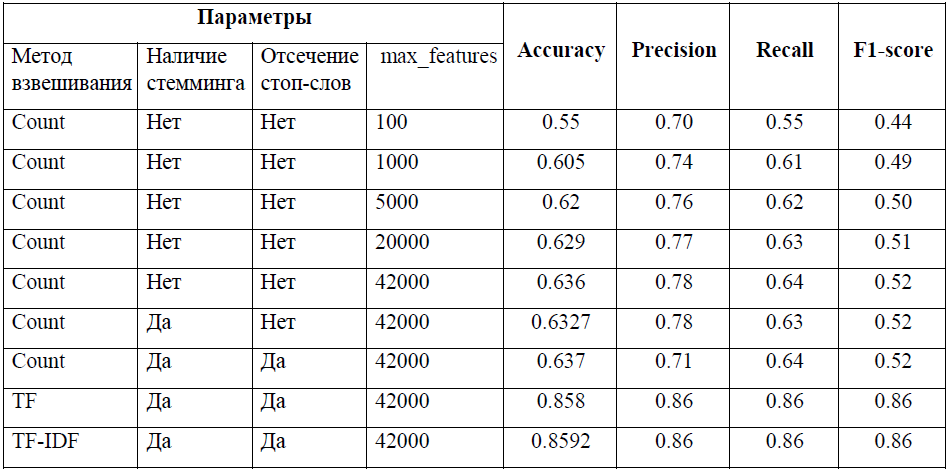

##**Вывод:**

в ходе лабораторной работы выяснилось, что на качество классификации текстовых документов влияет следующие параметры:
* наличие стемминга
* отсечение стоп-слов
* размер словаря
* метод взвешивания (в моем случае изменение метода с Count на TF или TF-IDF привело к значительному улучшению качества классификации)